In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

stud = pd.read_csv('stud_math.csv')

In [2]:
display(stud.head(10))
stud.info() 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [3]:
stud.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

In [4]:
stud.rename(columns = {'Pstatus': 'pstatus', 'Medu': 'medu','Fedu':'fedu','Mjob':'mjob','Fjob':'fjob'}, inplace = True)
display(stud.head(10))

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


In [5]:
print(stud.school.nunique())
pd.DataFrame(stud.school.value_counts())

2


,school
GP,349
MS,46


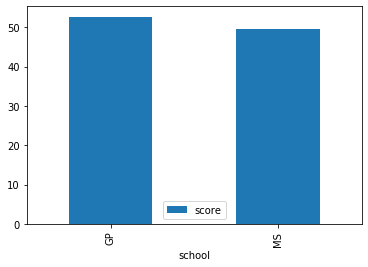

In [6]:
stud.pivot_table(values = ['score'], 
               index = 'school').plot(kind = 'bar')
#По графикам видно, что различие между школами незначительно

In [7]:
#Данные взяты только по двум школам, незаполненных данных нет.
#Слишком мало данных для больших выводов на данный момент

In [8]:
print(stud.sex.nunique())
pd.DataFrame(stud.sex.value_counts())

2


,sex
F,208
M,187


In [9]:
(208-187)/100 #девочек на 21% больше, чем мальчиков в данной выборке, людей с другим гендером не обнаружено

0.21

In [10]:
print(stud.age.nunique())
pd.DataFrame(stud.age.value_counts()) 

8


,age
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1


count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

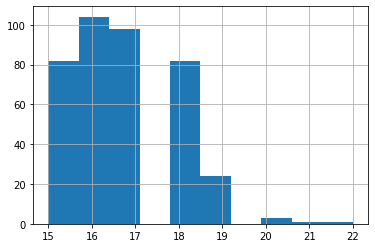

In [11]:
stud.age.hist()
stud.age.describe() 
#В данном анализе видно, что есть выбросы, 
#но смысла их удалять нет тк изначально делается выборка именно по данному возрасту.

In [12]:
print(stud.address.nunique())
pd.DataFrame(stud.address.value_counts()) 
#Большинство живет в городе. Некоторые(17 человек) не ответили на данный вопрос.

2


,address
U,295
R,83


In [13]:
stud.address.describe()

count     378
unique      2
top         U
freq      295
Name: address, dtype: object

In [14]:
print(stud.famsize.nunique())
pd.DataFrame(stud.famsize.value_counts())
#Больше половины живет в семье где больше 3х человек, 27 человек затруднились ответить на этот вопрос.

2


,famsize
GT3,261
LE3,107


In [15]:
print(stud.pstatus.nunique())
pd.DataFrame(stud.pstatus.value_counts())
#Почти 80% живет с родителями, 45(11,4%) экзаменуемых не ответили на вопрос

2


,pstatus
T,314
A,36


In [16]:
print(stud.medu.nunique())
pd.DataFrame(stud.medu.value_counts())


5


,medu
4.0,131
2.0,102
3.0,97
1.0,59
0.0,3


count    392.000000
mean       2.750000
std        1.098127
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: medu, dtype: float64

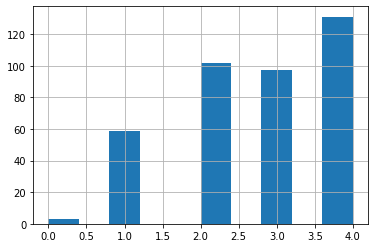

In [17]:
stud.medu.hist()
stud.medu.describe()

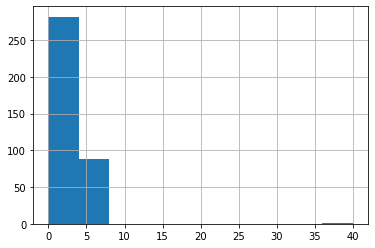

In [18]:
stud.fedu.hist()
stud.fedu.describe()

def fix_fedu(x):
    if x == 40:
        x = 4
    return x
stud.fedu = stud.fedu.apply(fix_fedu) 
#Очевидно студент ошибся и вместо 4 ответил 40, заменяем ответ на подходящий для дальнейшего анализа

count    371.000000
mean       2.517520
std        1.088808
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: fedu, dtype: float64

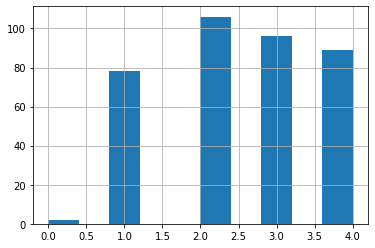

In [19]:
stud.fedu.hist()
stud.fedu.describe()
#Теперь мы видим более корректные данные

In [20]:
fmedu = stud.iloc[:, 6:8]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002D8E1ED8F88>,
      dtype=object)

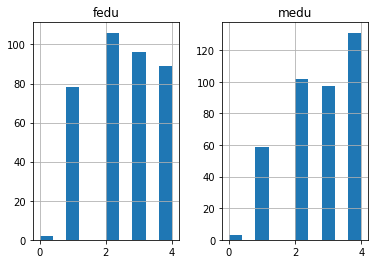

In [21]:
fmedu.hist()
#Видно, что в среднем у матерей образование лучше, чем у отцов

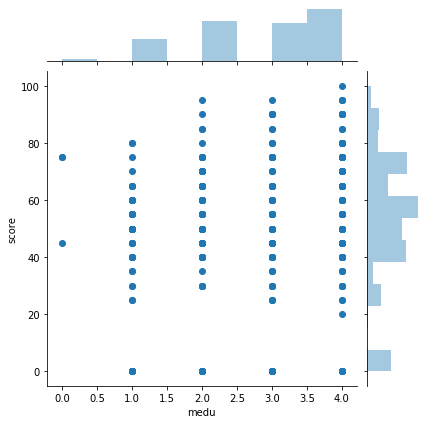

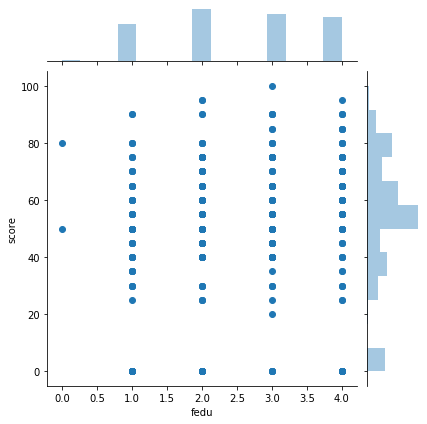

In [22]:
display(sns.jointplot(x = 'medu',y = 'score',data = stud),sns.jointplot(x = 'fedu',y = 'score',data = stud))
#Считаю, что данный параметр не влияет на итоговую оценку

In [23]:
print(stud.mjob.nunique())
print(pd.DataFrame(stud.mjob.value_counts())) #19 не ответили
print(stud.fjob.nunique())
print(pd.DataFrame(stud.fjob.value_counts())) #36 не ответили

5
          mjob
other      133
services    98
at_home     58
teacher     55
health      32
5
          fjob
other      197
services   102
teacher     29
at_home     16
health      15


In [24]:
print(stud.reason.nunique())
print(pd.DataFrame(stud.reason.value_counts()))#17 не ответили
print(stud.guardian.nunique())
print(pd.DataFrame(stud.guardian.value_counts()))#31 не ответили

4
            reason
course         137
home           104
reputation     103
other           34
3
        guardian
mother       250
father        86
other         28


In [25]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x = column, y = 'score', 
                data = stud.loc[stud.loc[:, column].isin(stud.loc[:, column].value_counts().index[:10])],
               ax = ax)
    plt.xticks(rotation = 45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

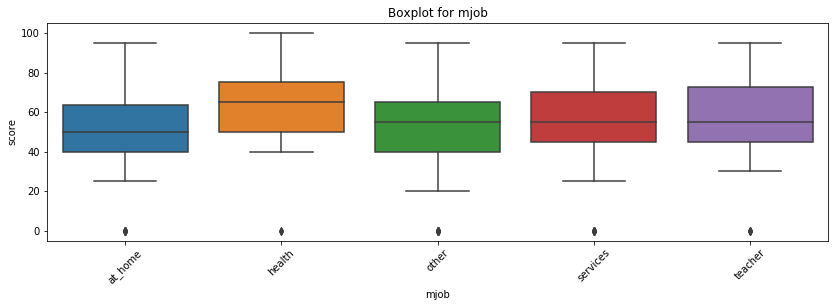

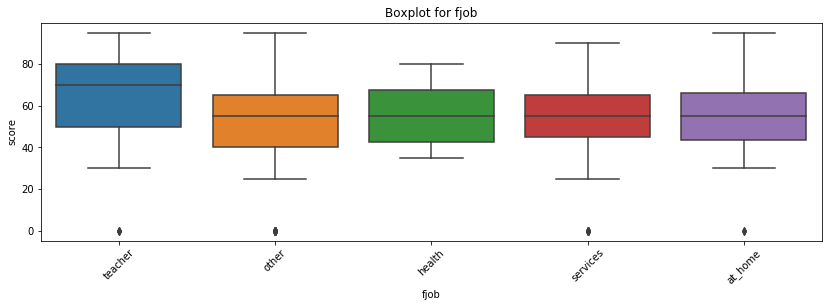

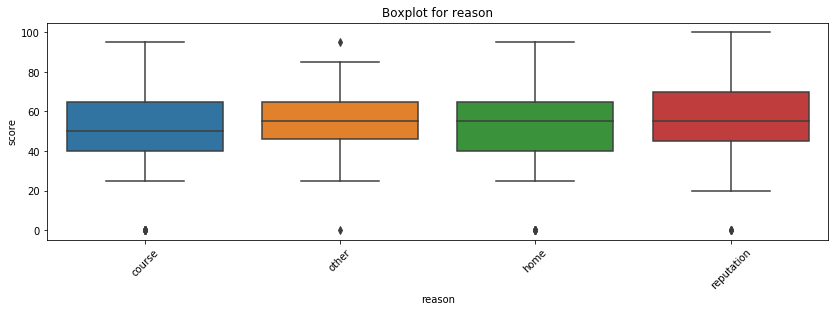

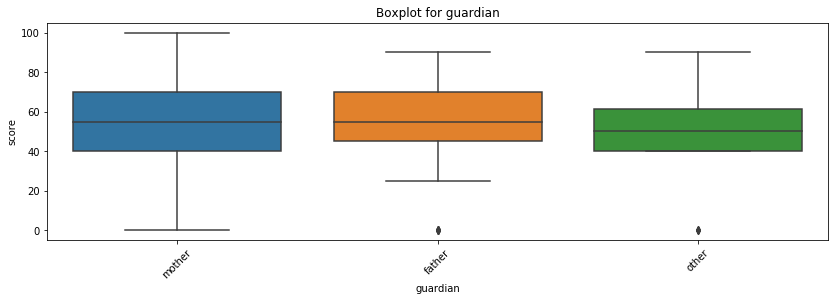

In [26]:
for col in ['mjob', 'fjob', 'reason', 'guardian']:
    get_boxplot(col)
#Причины распределяются равномерно, поэтому в меньшей степени влияют на итоговые оценки
#Опекунство в среднем тоже не влияет.
#Рассмотрим зависимость от работы матери и отца далее

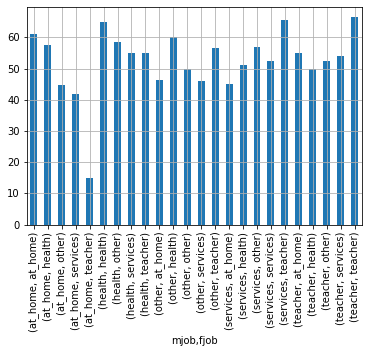

In [27]:
stud.groupby(by = ['mjob', 'fjob'])['score'].mean().plot(kind = 'bar', grid = True)
#На графике мы видим, что некоторые комбинации влияют на итогувую оценку негативно, например колонка №5
#Самый лучший результат у детей, оба родителя которых работают учителями

In [28]:
def get_stat_dif(column):
    cols = stud.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud.loc[stud.loc[:, column] == comb[0], 'score'], 
                        stud.loc[stud.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [29]:
for col in ['mjob', 'fjob', 'reason', 'guardian']:
    get_stat_dif(col)
#Поскольку выявлено различия в колонке mjob, считаю правильным оставить и колонку fjob, принимая во внимание график выше

Найдены статистически значимые различия для колонки mjob


C:\Users\4thChance\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\4thChance\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\4thChance\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


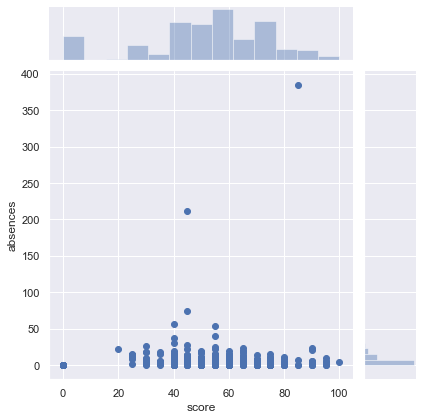

In [30]:
sns.set()
sns.jointplot(x = 'score',y = 'absences',data = stud)
#Видны выбросы, избавимся от них для улучшения анализа

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


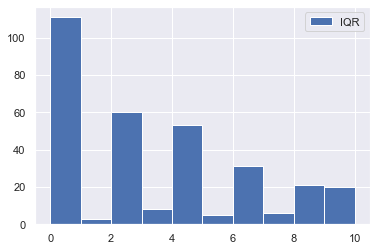

In [31]:
median = stud.absences.median()
IQR = stud.absences.quantile(0.75) - stud.absences.quantile(0.25)
perc25 = stud.absences.quantile(0.25)
perc75 = stud.absences.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f = perc25 - 1.5*IQR, l = perc75 + 1.5*IQR))
stud.absences.loc[stud.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 10, range = (0, 10), 
                                                                                             label = 'IQR')
plt.legend();

In [32]:
stud = stud.loc[stud.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]
stud

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,MS,F,18,U,GT3,T,1.0,1.0,other,other,course,mother,NaN,2.0,1.0,no,no,no,yes,yes,-6.0,yes,NaN,no,1.0,1.0,1.0,5.0,0.0,0.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


In [33]:
print(stud.traveltime.nunique())
print(pd.DataFrame(stud.traveltime.value_counts()))
print(stud.traveltime.describe())
print(stud.studytime.nunique())
print(pd.DataFrame(stud.studytime.value_counts()))
print(stud.studytime.describe()) 

4
     traveltime
1.0         223
2.0          86
3.0          22
4.0           7
count    338.000000
mean       1.446746
std        0.709289
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64
4
     studytime
2.0        178
1.0         96
3.0         60
4.0         27
count    361.000000
mean       2.049861
std        0.854892
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64


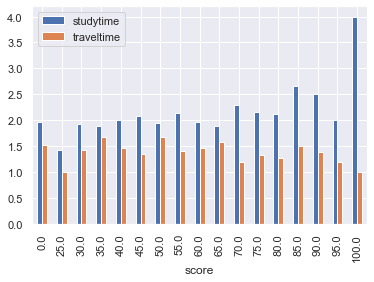

In [34]:
stud.pivot_table(values = ['traveltime','studytime'], 
               index = 'score').plot(kind = 'bar')

#Временя в пути до школы особое влияние на резулитат не дает
#Оченвидно, что чем больше студент учился, тем выше результат, данный показатель оставляем

In [35]:
def fix_yesno(x):
    if x == 'NaN':
        return None
    elif x == 'yes':
        x = 1
    elif x == 'no':
        x = 0
    return x

In [36]:
stud.schoolsup = stud.schoolsup.apply(fix_yesno)
stud.famsup = stud.famsup.apply(fix_yesno)    
stud.paid = stud.paid.apply(fix_yesno)    
stud.activities = stud.activities.apply(fix_yesno)    
stud.nursery = stud.nursery.apply(fix_yesno)    
stud.higher = stud.higher.apply(fix_yesno)    
stud.internet = stud.internet.apply(fix_yesno)    
stud.romantic = stud.romantic.apply(fix_yesno)    

stud

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,-6.0,1.0,NaN,0.0,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,-6.0,1.0,1.0,0.0,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,1.0,0.0,NaN,0.0,1.0,-6.0,1.0,1.0,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,0.0,1.0,1.0,1.0,1.0,-9.0,1.0,1.0,1.0,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,0.0,1.0,1.0,0.0,1.0,-6.0,1.0,0.0,0.0,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,MS,F,18,U,GT3,T,1.0,1.0,other,other,course,mother,NaN,2.0,1.0,0.0,0.0,0.0,1.0,1.0,-6.0,1.0,NaN,0.0,1.0,1.0,1.0,5.0,0.0,0.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.0,1.0,1.0,0.0,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,0.0,0.0,0.0,0.0,-3.0,NaN,0.0,0.0,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,0.0,0.0,0.0,NaN,0.0,-3.0,1.0,1.0,0.0,4.0,4.0,1.0,5.0,0.0,50.0


In [37]:
stud.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
       'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

In [38]:
stud.drop(['studytime, granular'], inplace = True, axis = 1) #Вырезаем непонятные данные
stud

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,NaN,0.0,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,1.0,0.0,NaN,0.0,1.0,1.0,1.0,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,MS,F,18,U,GT3,T,1.0,1.0,other,other,course,mother,NaN,2.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,NaN,0.0,1.0,1.0,1.0,5.0,0.0,0.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,0.0,0.0,0.0,NaN,0.0,1.0,1.0,0.0,4.0,4.0,1.0,5.0,0.0,50.0


(<matplotlib.axes._subplots.AxesSubplot at 0x2d8e20fc808>,)

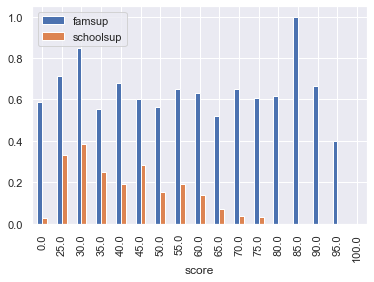

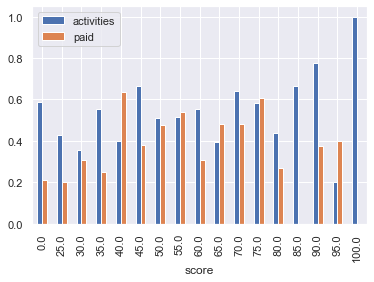

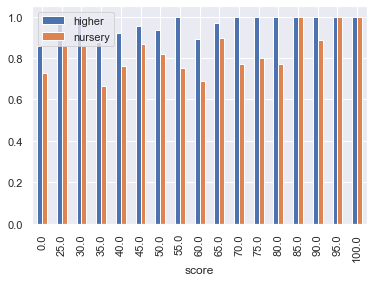

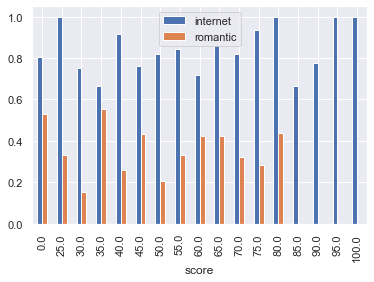

In [39]:
stud.pivot_table(values = ['schoolsup', 'famsup',],#Есть небольшое отклонение не в пользу дополнительной образовательной поддержки, помоает преодолеть нулевой барьер
                 index = 'score',                  #Поддержка семьи практически не влияет
               ).plot(kind = 'bar'),                
stud.pivot_table(values = ['paid', 'activities'], #Платные занятия помогаю достижению среднего результата, но необходимо рассмотреть подробнее
               index = 'score',                   #Внеучебные занятия необходимо рассмотреть подробнее
               ).plot(kind = 'bar'),
stud.pivot_table(values = ['nursery','higher',], #Опыт детского сада и желание поступить в высшее учебное заведение не влияют на результат
               index = 'score', 
               ).plot(kind = 'bar'),
stud.pivot_table(values = [ 'internet', 'romantic'], #Наличие интернета дома необходимо рассмотреть подробнее
               index = 'score',                      #Романтические отношения влияют на высоких оценках, необходимо рассмотреть подробнее
               ).plot(kind = 'bar'),

In [40]:
print(stud.paid.describe(), pd.DataFrame(stud.paid.value_counts())), #Данные подтвердили, что платные занятия помогают достижению средних результатов, но не более
print(stud.activities.describe(), pd.DataFrame(stud.activities.value_counts())) , #Внеучебная активность помогает добиться лучших результатов
print(stud.internet.describe(), pd.DataFrame(stud.internet.value_counts())) ,  #Интернет был у большинства, считаю данный показатель не влияет на итог
print(stud.romantic.describe(), pd.DataFrame(stud.romantic.value_counts())) ,  #Романтические отношения мешают достижению абсолютных результатов

count    328.000000
mean       0.423780
std        0.494911
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: paid, dtype: float64      paid
0.0   189
1.0   139
count    352.000000
mean       0.522727
std        0.500194
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: activities, dtype: float64      activities
1.0         184
0.0         168
count    334.000000
mean       0.835329
std        0.371440
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: internet, dtype: float64      internet
1.0       279
0.0        55
count    336.000000
mean       0.330357
std        0.471043
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: romantic, dtype: float64      romantic
0.0       225
1.0       111


(None,)

25-й перцентиль: 4.0, 75-й перцентиль: 5.0, IQR: 1.0,  Границы выбросов: [2.5, 6.5].


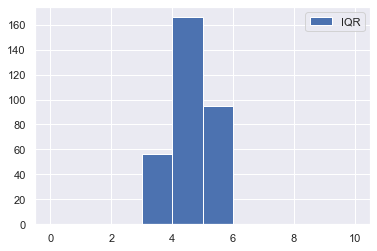

In [41]:
median = stud.famrel.median()
IQR = stud.famrel.quantile(0.75) - stud.famrel.quantile(0.25)
perc25 = stud.famrel.quantile(0.25)
perc75 = stud.famrel.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f = perc25 - 1.5*IQR, l = perc75 + 1.5*IQR))
stud.famrel.loc[stud.famrel.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 10, range = (0, 10), 
                                                                                             label = 'IQR')
plt.legend();


In [42]:
stud = stud.loc[stud.famrel.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]
pd.DataFrame(stud.famrel.value_counts())
#Правктически у всех отношения в семье положительные, не берем эти данные в будущий анализ

,famrel
4.0,166
5.0,95
3.0,56


25-й перцентиль: 3.0, 75-й перцентиль: 4.0, IQR: 1.0,  Границы выбросов: [1.5, 5.5].


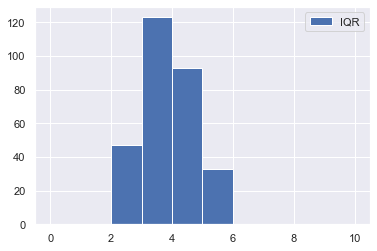

In [43]:
median = stud.freetime.median()
IQR = stud.freetime.quantile(0.75) - stud.freetime.quantile(0.25)
perc25 = stud.freetime.quantile(0.25)
perc75 = stud.freetime.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f = perc25 - 1.5*IQR, l = perc75 + 1.5*IQR))
stud.freetime.loc[stud.freetime.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 10, range = (0, 10), 
                                                                                             label = 'IQR')
plt.legend();

In [44]:
stud = stud.loc[stud.freetime.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]
pd.DataFrame(stud.freetime.value_counts())
#Свободное время было практически у всех студентов, упомянем этот факт, но включать даныые из этого столбца не будем

,freetime
3.0,123
4.0,93
2.0,47
5.0,33


25-й перцентиль: 2.0, 75-й перцентиль: 4.0, IQR: 2.0,  Границы выбросов: [-1.0, 7.0].


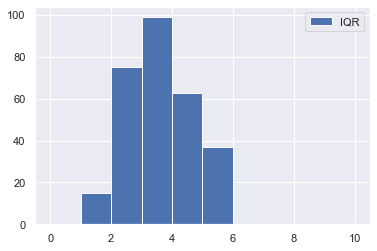

In [45]:
median = stud.goout.median()
IQR = stud.goout.quantile(0.75) - stud.goout.quantile(0.25)
perc25 = stud.goout.quantile(0.25)
perc75 = stud.goout.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f = perc25 - 1.5*IQR, l = perc75 + 1.5*IQR))
stud.goout.loc[stud.goout.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 10, range = (0, 10), 
                                                                                             label = 'IQR')
plt.legend();


In [46]:
stud = stud.loc[stud.goout.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]
pd.DataFrame(stud.goout.value_counts())
#Встречи с друзьями влияют скорее отрицательно, хотя здесь хотелось бы уточнить для чего были эти встречи(возможно для учебы)

,goout
3.0,99
2.0,75
4.0,63
5.0,37
1.0,15


25-й перцентиль: 3.0, 75-й перцентиль: 5.0, IQR: 2.0,  Границы выбросов: [0.0, 8.0].


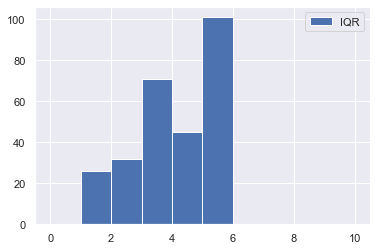

In [47]:
median = stud.health.median()
IQR = stud.health.quantile(0.75) - stud.health.quantile(0.25)
perc25 = stud.health.quantile(0.25)
perc75 = stud.health.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f = perc25 - 1.5*IQR, l = perc75 + 1.5*IQR))
stud.health.loc[stud.health.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 10, range = (0, 10), 
                                                                                             label = 'IQR')
plt.legend();

In [48]:
stud = stud.loc[stud.health.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]
pd.DataFrame(stud.health.value_counts())
#Практически у всех студентов отличное здоровье, упомянем

,health
5.0,101
3.0,71
4.0,45
2.0,32
1.0,26


(<matplotlib.axes._subplots.AxesSubplot at 0x2d8e3758f88>,)

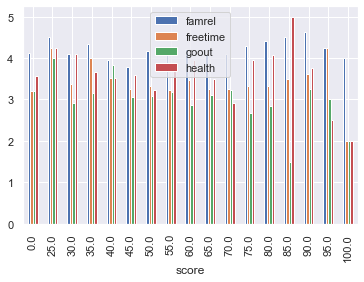

In [49]:
stud.pivot_table(values = ['famrel', 'freetime','goout','health'],
                 index = 'score',                  
               ).plot(kind = 'bar'),  

In [50]:
stud

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,NaN,0.0,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,1.0,0.0,NaN,0.0,1.0,1.0,1.0,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,MS,F,19,R,GT3,T,2.0,3.0,services,other,course,mother,1.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,5.0,4.0,2.0,5.0,0.0,0.0
388,MS,F,18,U,LE3,T,3.0,1.0,teacher,services,course,mother,1.0,2.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,4.0,3.0,4.0,1.0,0.0,40.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,0.0,0.0,0.0,NaN,0.0,1.0,1.0,0.0,4.0,4.0,1.0,5.0,0.0,50.0


In [51]:
stud.drop(['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu','reason', 'guardian', 'traveltime','failures','famsup','nursery',
       'higher', 'internet','famrel', 'freetime', 'goout','health'], inplace = True, axis = 1)
stud

,mjob,fjob,studytime,schoolsup,paid,activities,romantic,absences,score
0,at_home,teacher,2.0,1.0,0.0,0.0,0.0,6.0,30.0
1,at_home,other,2.0,0.0,0.0,0.0,0.0,4.0,30.0
2,at_home,other,2.0,1.0,NaN,0.0,NaN,10.0,50.0
3,health,NaN,3.0,0.0,1.0,1.0,1.0,2.0,75.0
4,other,other,2.0,0.0,1.0,0.0,0.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...
387,services,other,3.0,0.0,0.0,1.0,0.0,0.0,0.0
388,teacher,services,2.0,0.0,1.0,0.0,0.0,0.0,40.0
392,other,other,1.0,NaN,0.0,0.0,0.0,3.0,35.0
393,services,other,1.0,0.0,0.0,NaN,0.0,0.0,50.0


In [52]:
stud_corr = stud
stud_corr.drop(['mjob', 'fjob', 'studytime', 'schoolsup', 'paid','activities','romantic'], inplace = True, axis = 1)
stud_corr

,absences,score
0,6.0,30.0
1,4.0,30.0
2,10.0,50.0
3,2.0,75.0
4,4.0,50.0
...,...,...
387,0.0,0.0
388,0.0,40.0
392,3.0,35.0
393,0.0,50.0


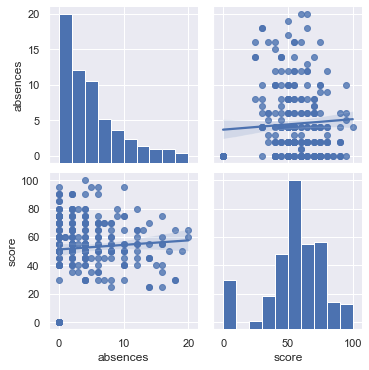

In [53]:
sns.pairplot(stud_corr, kind = 'reg')

In [54]:
stud_corr.corr()
#Наблюдается положительная корреляция у студентов с минимальными пропусками, что вписывается в логику

,absences,score
absences,1.00000,0.06887
score,0.06887,1.00000


In [55]:
Вывод:
    После обработки данных можно сказать, что больше всего на итоговые оценки влияют 8 параметров.
    
    В случае с параметром "Работа родителей" на графике мы видим, что некоторые комбинации влияют на итогувую оценку негативно, например когда мать домохозяйка, а отец учитель.
    Самый лучший результат у детей, оба родителя которых работают учителями.

    Оченвидно, что чем больше студент учился, тем выше результат, данный показатель показывает на сколько необходимо ответсвенно подходить к занятиям.

    Есть небольшое отклонение не в пользу дополнительной образовательной поддержки, она помоает преодолеть нулевой барьер, но не более того, подойдет для студентов из группы риска.

    Данные подтвердили, что платные занятия помогают достижению средних результатов, но не гарантируют высший балл.

    Внеучебная активность помогает добиться лучших результатов, что подстверждают данные.

    Романтические отношения мешают достижению абсолютных результатов.

    Свободное время было практически у всех студентов,возможно следует изучить подробнее на что студенты тратили это время для уточнения данных.

    Встречи с друзьями влияют скорее отрицательно, хотя здесь хотелось бы уточнить для чего были эти встречи(возможно для учебы)

    Практически у всех студентов отличное здоровье, значит данные собирали в обычной школе.

    Наблюдается положительная корреляция у студентов с минимальными пропусками, что вписывается в логику.


SyntaxError: invalid syntax (<ipython-input-55-70b0d8fdd488>, line 1)